# Trabalho Final para aprovação do curso Sistemas Inteligentes

#### Instruções: 
- Comentem bastante o código, deixe o mais claro possível
- Usem e abusem do Markdown
- Isso ae!

# Pre-Processamento

#### Importação de bibliotecas

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import matplotlib.colors
import pandas as pd
import time
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')


In [2]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

##### Carregando dataset

In [3]:
#Dataset para treinamento
db = pd.read_csv("bank-additional-dataset/bank-additional-full.csv", sep= ";");

##### Informações sobre o dataset

In [4]:
print("Dimensões do dataset", db.shape)

Dimensões do dataset (41188, 21)


In [5]:
print("Features do dataset: ", db.columns)

Features do dataset:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

##### Como podemos observar há 11 features categóricas, é um número significante e teremos que tratá-los num futuro próximo

In [6]:
#tipos de dados para cada feature
db.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# print the first 20 rows of data
print(db.head(20))

    age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   

In [8]:
db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Contando número de valores nulos no dataset
db.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#Visualizando valores unicos do dataset
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())
print()
print("Contact: ",db.contact.unique())
print()
print("Month : ",db.month.unique())
print()
print("Duration: ",db.duration.unique())
print()
print("Campaign: ",db.campaign.unique())
print()
print("Pdays: ",db.pdays.unique())
print()
print("previous: ",db.previous.unique())
print()
print("Poutcome: ",db.poutcome.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']

Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Duration:  [ 261  149  226 ... 1246 1556 1868]

Campaign:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

Pdays:  [999   6   

## Tratamento do dataset por blocos
        - Bank client data
        - Last contact of the current campaign
        - Social and economic context attributes
        - Other attributes:

# 1. Bank Client Data

In [11]:
#Particionando o Dataset para trabalhar apenas com os Client Data
bank_client = db.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [12]:
#Visualizando as amostras 
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']


##### Visualização dos Dados

##### Distribuição de idades

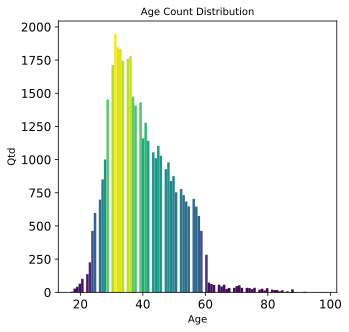

In [13]:
#Deixar Histograma colorido
N, bins, patches = plt.hist(bank_client['age'], bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('Age', fontsize =10)
plt.ylabel('Qtd', fontsize =10)
plt.title('Age Count Distribution', fontsize =10)
#plt.savefig('age_count_distribuition.png', format='png', dpi =800)
plt.show()

###### Distribuição de trabalhos dos clientes

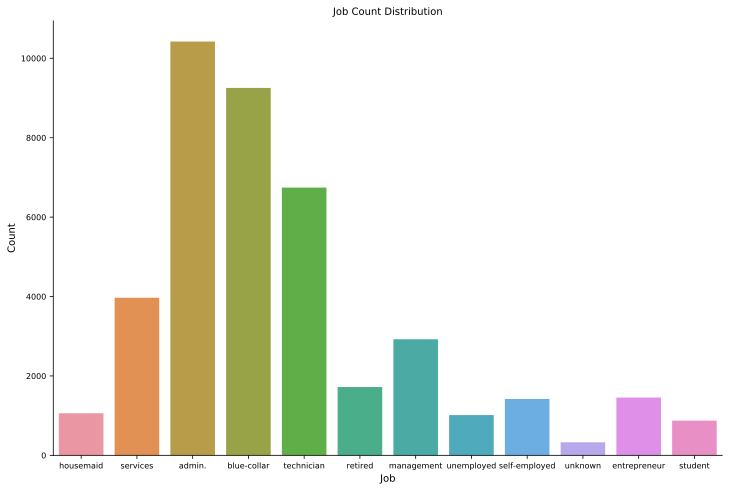

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Count Distribution', fontsize=10)
ax.tick_params(labelsize=8)
sns.despine()
# plt.savefig('job_count_distribuition.png', format='png', dpi =200)

##### Distribuição estado civil

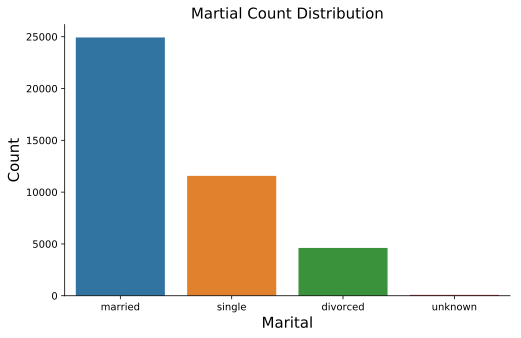

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Martial Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()
#plt.savefig('martial_count_distribuition.png', format='png', dpi =300)

##### Distribuição Escolaridade

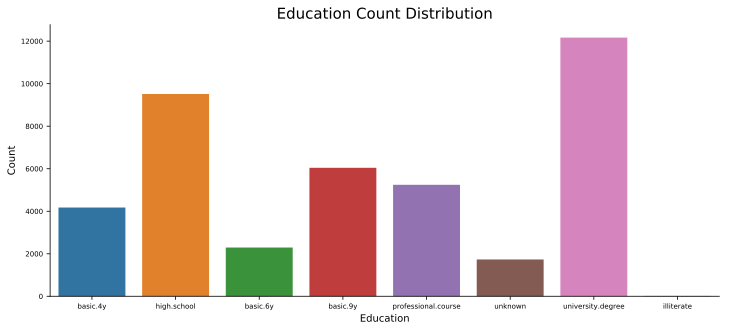

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=7)
sns.despine()
#plt.savefig('education_count_distribuition.png', format='png', dpi =300)

###### Distribuição Housing, Loan e Default

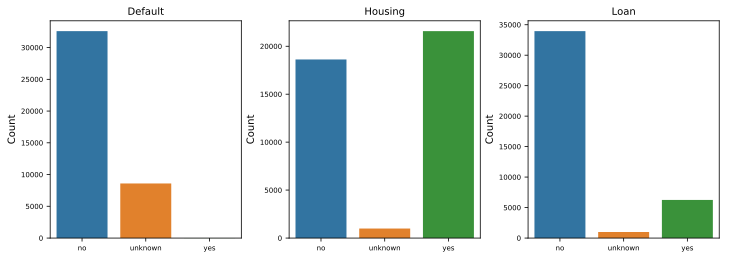

In [17]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)
#plt.savefig('housing_count_distribuition.png', format='png', dpi =300)
plt.subplots_adjust(wspace=0.25)

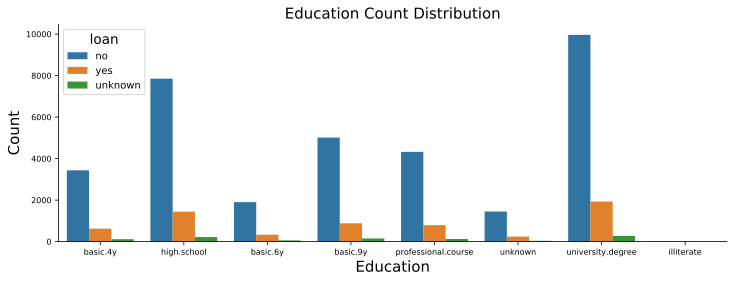

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
sns.countplot(x = 'education', hue = 'loan', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
#plt.savefig('education_count_distribuition_loan.png', format='png', dpi =300)
sns.despine()

#### Tratamento com os dados Categoricos

In [19]:
#Transformações de dados categoricos para valores numericos
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'] )

In [20]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


# 2. Related with the last contact of the current campaign


In [21]:
#Particionando o Dataset para trabalhar apenas com 'Related with the last contact of the current campaign'
bank_related = db.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [22]:
#Visualizando as amostras do dataset
print("Contact: ", bank_related.contact.unique())
print()
print("Month : ", bank_related.month.unique())
print()
print("Day of week: ", bank_related.day_of_week.unique())
print()
print("Duration: ", bank_related.duration.unique())
print()


Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Day of week:  ['mon' 'tue' 'wed' 'thu' 'fri']

Duration:  [ 261  149  226 ... 1246 1556 1868]



In [23]:
# Distribuição Contatos, mes e dias da semana

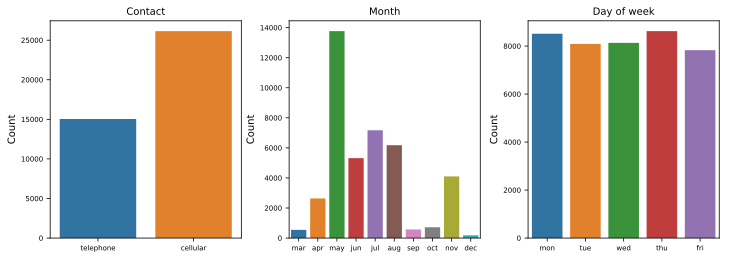

In [24]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'contact', data = bank_related, ax = ax1, order = ['telephone', 'cellular'])
ax1.set_title('Contact', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'month', data = bank_related, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']
)
ax2.set_title('Month', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'day_of_week', data = bank_related, ax = ax3, order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title('Day of week', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)

plt.subplots_adjust(wspace=0.25)

#['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']


##### Distribuição duração vs ocorrência

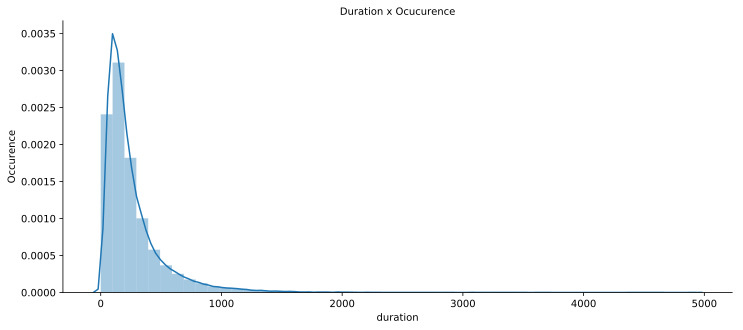

In [25]:

fig, ax2 = plt.subplots()
fig.set_size_inches(12, 5)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)
sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)



In [26]:
# As ligações que tiverem o tempo de duração da ligação zero automaticamente o target será 'no', assim devemos excluir essas linhas
db[(db['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


#### Tratamento com os dados Categoricos

In [27]:
#Transformações de dados categoricos para valores numericos
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


# 3. Social and economic context attributes

In [28]:
#Particionando o Dataset para trabalhar apenas com 'Social and Economic context attibutes'
bank_se = db.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# 4. Other attributes

In [29]:
bank_o = db.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [30]:
#Visualizando as amostras do dataset
print("Contact: ", bank_o.poutcome.unique())
print()

Contact:  ['nonexistent' 'failure' 'success']



##### Tratamento com dados categoricos

In [31]:
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])
#bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


# Validação dos dados 

In [32]:
#Montado o dataset pre-processado
db_pronto= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
db_pronto = db_pronto[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

#Criando Target
y = pd.get_dummies(db['y'], columns = ['y'], prefix = ['y'], drop_first = True)

#Excluindo linhas no qual o tempo de ligação é 0
db_pronto = db_pronto.drop('duration', axis=1)
#y = y.drop([6251,23031,28063, 33015], axis = 0)

#Confirmando exclusão
#print(db_pronto.loc[db_pronto['duration'] == 0])

print(db_pronto.shape)
print(y.shape)


(41188, 19)
(41188, 1)


# Treinamento do modelo

In [33]:
y_array = np.array(y)

#transformando em um vetor 1D
y_array = y_array.reshape(-1)
#y_array = y_array.flatten()

y_array.shape

(41188,)

In [34]:
#Bibliotecas para validação dos modelos
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold

In [35]:
kfold = KFold(n_splits=10, random_state=42)
#cross_val_score(model, dataset, y, cv=kfold, scoring='accuracy')

## 1. KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier as KNN

###### Escolhendo K vizinhos para o modelo

k=1 84.14 
k=2 88.46 
k=3 87.70 
k=4 88.87 
k=5 88.55 
k=6 88.88 
k=7 88.65 
k=8 88.95 
k=9 88.79 
k=10 89.02 
k=11 88.95 
k=12 89.10 
k=13 89.19 
k=14 89.32 
k=15 89.32 
k=16 89.45 
k=17 89.41 
k=18 89.46 
k=19 89.44 
k=20 89.39 
k=21 89.45 
k=22 89.37 
k=23 89.56 
k=24 89.44 
k=25 89.64 
Número ótimo de vizinhos é  24 com 89.6%


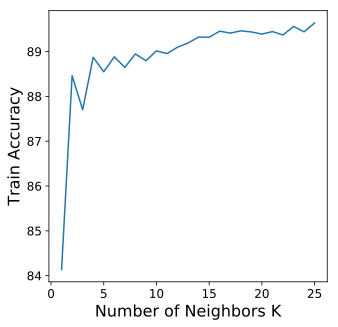

In [127]:
neighbors = np.arange(1,26)

#Lista vazia para guardar os resultados
cv_scores = []

#Interação para poder decidir quando vizinhos usar no KNN com 10-fold
for k in neighbors:
    k_value = k
    knn = KNN(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = KFold(n_splits=10, random_state=42)
    scores = cross_val_score(knn, db_pronto, y_array, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f " % (k_value, scores.mean()*100))

optimal_k = cv_scores.index(max(cv_scores)) + 1
print ("Número ótimo de vizinhos é  %d com %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [133]:
#Uma vez escolhido k vizinhos vamos validar o modelo com os k vizinhos
timerStart = time.time()
knn = KNN(n_neighbors = 25, weights='uniform', p=2, metric='euclidean')
scores = cross_validate(estimator=knn, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStop = time.time()
cpuTime = timerStop - timerStart

In [134]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores = pd.DataFrame(scores)
scores.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.378939,1.236227,0.972323,0.894278,0.000000,0.679692,0.000000,0.253646,0.000000,0.369429
1,1.349099,1.362269,0.964797,0.895115,0.000000,0.679692,0.000000,0.255395,0.000000,0.371281
2,1.411844,2.089104,0.957757,0.895978,0.000000,0.680473,0.000000,0.257501,0.000000,0.373619
3,1.343953,1.996542,0.933722,0.898675,0.000000,0.680662,0.000000,0.263568,0.000000,0.379993
4,1.348821,1.994203,0.937606,0.898244,0.000000,0.680662,0.000000,0.262606,0.000000,0.378992
5,1.353795,2.723115,0.945375,0.897246,0.000000,0.679290,0.000000,0.260023,0.000000,0.376085
6,1.335974,1.943382,0.895606,0.902425,0.260870,0.681055,0.014320,0.269131,0.027149,0.385804
7,1.335800,2.251541,0.879097,0.903774,0.222222,0.677914,0.004057,0.266458,0.007968,0.382551
8,1.324691,2.088735,0.845070,0.907958,0.560976,0.685897,0.070988,0.268036,0.126027,0.385447
9,1.552284,0.970158,0.632346,0.927219,0.629630,0.611607,0.485201,0.049854,0.548060,0.092194


In [135]:
print("Média Acurácia", round(scores['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores['test_precision'].mean(), 3))
print("Média Recall", round(scores['test_recall'].mean(), 3))
print("Média Recall", round(scores['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTime/360), int(cpuTime/60), int(cpuTime%60)))

Média Acurácia 0.896
Média Precisão 0.167
Média Recall 0.057
Média Recall 0.071
Tempo de CPU 00:03:35


## 2. Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier


In [137]:
timerStart = time.time()
dtree = DecisionTreeClassifier(criterion='gini') #ou Gini
scores_1 = cross_validate(estimator=dtree, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStop = time.time()
cpuTime = timerStop - timerStart

In [138]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_1 = pd.DataFrame(scores_1)
scores_1.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.140622,0.005732,0.924253,0.993660,0.028571,0.997911,0.052632,0.950066,0.037037,0.973401
1,0.128600,0.005572,0.927652,0.993607,0.030675,0.997895,0.034483,0.949277,0.032468,0.972979
2,0.132881,0.005609,0.887837,0.993633,0.050000,0.997881,0.091954,0.949172,0.064777,0.972917
3,0.135850,0.005868,0.876912,0.994551,0.063433,0.997848,0.062271,0.955805,0.062847,0.976374
4,0.123336,0.005804,0.867444,0.994416,0.063444,0.998092,0.081712,0.954597,0.071429,0.975860
5,0.131255,0.006102,0.836854,0.994011,0.048485,0.998099,0.106667,0.951529,0.066667,0.974258
6,0.132915,0.005700,0.825200,0.994659,0.181818,0.998266,0.205251,0.954750,0.192825,0.976023
7,0.123776,0.005659,0.799466,0.994200,0.147992,0.998479,0.141988,0.949602,0.144928,0.973427
8,0.123502,0.005905,0.767848,0.994389,0.215867,0.997895,0.180556,0.949900,0.196639,0.973306
9,0.125158,0.005907,0.557552,0.994146,0.522236,0.996859,0.434461,0.923945,0.474322,0.959018


In [140]:
print("Média Acurácia", round(scores_1['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_1['test_precision'].mean(), 3))
print("Média Recall", round(scores_1['test_recall'].mean(), 3))
print("Média Recall", round(scores_1['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTime/360), int(cpuTime/60), int(cpuTime%60)))

Média Acurácia 0.827
Média Precisão 0.135
Média Recall 0.139
Média Recall 0.134
Tempo de CPU 00:00:01


### 3. Artificial Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
scores_2_list = []
for i in range(1,56):
    scores_2_tmp = []
    ANN = MLPClassifier(hidden_layer_sizes=(i), random_state=42)
    scores_2_pre = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
    scores_2_tmp.append(scores_2_pre['fit_time'].mean())
    scores_2_tmp.append(scores_2_pre['score_time'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_precision'].mean())
    scores_2_tmp.append(scores_2_pre['test_recall'].mean())
    scores_2_tmp.append(scores_2_pre['train_recall'].mean())
    scores_2_tmp.append(scores_2_pre['test_f1'].mean())
    scores_2_tmp.append(scores_2_pre['train_f1'].mean())
    scores_2_list.extend(scores_2_tmp)


In [39]:
#Para cada hidden layer temos as métricas médias proveniente do K-fold CV
scores_2_list = np.array(scores_2_list)
scores_2_list = scores_2_list.reshape(55,10)
scores_2_list
scores_2_list = pd.DataFrame(scores_2_list)
scores_2_list.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]
scores_2_list

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.644356,0.004824,0.887336,0.887346,0.887336,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.695595,0.004835,0.887336,0.887346,0.887336,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.552726,0.005099,0.887336,0.887346,0.887336,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.541650,0.005881,0.887336,0.887346,0.887336,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.067699,0.005162,0.898094,0.886887,0.898094,0.534686,0.059189,0.144480,0.079920,0.197713
5,3.200988,0.005140,0.885904,0.896547,0.885904,0.515045,0.014152,0.175630,0.022756,0.261928
6,1.260814,0.005459,0.890493,0.884189,0.890493,0.615401,0.019825,0.176326,0.034553,0.219344
7,0.938538,0.005409,0.885102,0.887019,0.885102,0.573248,0.023786,0.189707,0.039868,0.253259
8,0.891082,0.005955,0.891100,0.898010,0.891100,0.642968,0.060556,0.199725,0.074446,0.299212
9,0.917238,0.008101,0.834653,0.873887,0.834653,0.494904,0.139990,0.279249,0.082904,0.313002


In [64]:
#Maior acurácia
scores_2_list[scores_2_list['test_accuracy']==scores_2_list['test_accuracy'].max()]
#Número de hiiden layers = 4

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.898094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Selecionando valores das metricas na qual o modelo se saiu melhor na acuracia para k hidden layers
scores_2 = scores_2_list.loc[4]
scores_2 = np.array(scores_2)
scores_2

array([1.06769936, 0.00516155, 0.89809421, 0.88688711, 0.89809421,
       0.53468629, 0.05918934, 0.14447981, 0.07992   , 0.19771343])

## 4. Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()
scores_3 = cross_validate(estimator=LDA, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [ ]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_3 = pd.DataFrame(scores_3)
scores_3.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

In [ ]:
print("Média Acurácia", round(scores_3['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_3['test_precision'].mean(), 3))
print("Média Recall", round(scores_3['test_recall'].mean(), 3))
print("Média Recall", round(scores_3['test_f1'].mean(), 3))

## 5. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() 
scores_4 = cross_validate(estimator=logmodel, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [ ]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_4 = pd.DataFrame(scores_4)
scores_4.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

In [ ]:
print("Média Acurácia", round(scores_4['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_4['test_precision'].mean(), 3))
print("Média Recall", round(scores_4['test_recall'].mean(), 3))
print("Média Recall", round(scores_4['test_f1'].mean(), 3))

## 6. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVM = LinearSVC()
scores_5 = cross_validate(estimator=SVM, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [ ]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_5 = pd.DataFrame(scores_5)
scores_5.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

In [ ]:
print("Média Acurácia", round(scores_5['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_5['test_precision'].mean(), 3))
print("Média Recall", round(scores_5['test_recall'].mean(), 3))
print("Média Recall", round(scores_5['test_f1'].mean(), 3))

In [ ]:
scores['test_accuracy'].mean()
scores_1['test_accuracy'].mean()
scores_3['test_accuracy'].mean()
scores_4['test_accuracy'].mean()
scores_5['test_accuracy'].mean()
scores_2[2]

In [ ]:
#Comparação dos modelos - Acurácia
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_accuracy'].mean(), scores_1['test_accuracy'].mean(), scores_2[2], scores_3['test_accuracy'].mean(), scores_4['test_accuracy'].mean(), scores_5['test_accuracy'].mean()]})

modelos.sort_values(by='Score', ascending=False)

In [ ]:
#Comparação dos modelos - Recall
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_recall'].mean(), scores_1['test_recall'].mean(), scores_2[6], scores_3['test_recall'].mean(), scores_4['test_recall'].mean(), scores_5['test_recall'].mean()]})

modelos.sort_values(by='Score', ascending=False)

In [ ]:
modelos2 = np.array(modelos)

modelos2[:,1]

In [ ]:
import plotly
plotly.__version__

import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt

plt.bar(range(5), modelos[:,1], width, color="blue")


fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename='mpl-basic-bar')

# Resultados e Metricas 

# Discussões

# Referências

http://deeplizard.com/learn/video/FK77zZxaBoI